In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh  # eigh for symmetric/hermitian matrices construction
from matplotlib.cm import get_cmap

In [ ]:
# Define the variables
a = -10            # Left end point of the box
b = 10             # Right end point of the box
L = b - a          # Width of the box
N = 500            # Number of cells with uniform width of L/N
M = N - 1          # Total useful number of grid points, aka the divisions (2 grid points made from 1 division, n... from n-1)
X = a + L * np.arange(1, N) / N  # Dimensionless grid coordinates
T = np.zeros((M, M))  # Kinetic energy in Discrete Variable Representation (DVR), (N-1) by (N-1) dimensional matrix

# Define a function for calculating Hamiltonian, eigenvalues and eigenvectors
def eigenvalues(T, V):
    H = T + V # Total Hamiltonian
    eng, vec = eigh(H) # Calculate eigenvalues and eigenvectors, eigenvalues are returned in sorted order
    return H, eng, vec

In [124]:
# Calculate the spectrum
V = 0.5 * np.diag(X**2)  # Potential energy in DVR

# Obtain the kinetic energy matrix in DVR
nsum = np.arange(1, N)
nsquare = nsum**2
c = 0.5 * (np.pi / L)**2 * (2 / N)  # a constant

for i in range(M):
    for j in range(i, M):
        T[i, j] = c * np.sum(nsquare * np.sin(nsum * np.pi * (i+1) / N) * np.sin(nsum * np.pi * (j+1) / N))
        T[j, i] = T[i, j]  # because T is Hermitian

# Obtain the eigenvalues        
H, E1, vec1 = eigenvalues(T, V)

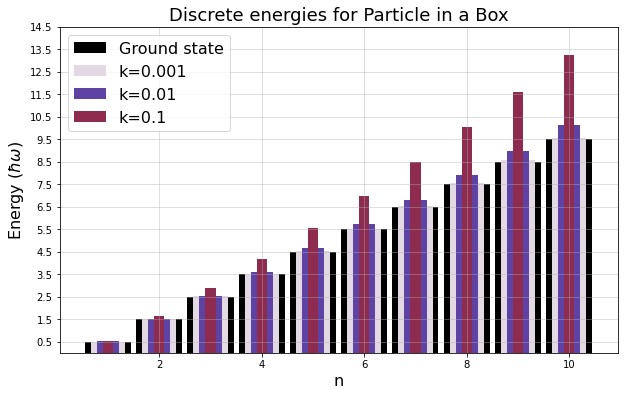

In [201]:
# Plot aesthetics
iterations = 3
width_list = np.linspace(0.2, 0.9, iterations, endpoint=False)[::-1] # reversed order as we wish to plot thicker widths first
twilight = get_cmap('twilight') # Getting the seismic colormap for plotting, 

# Plot the first 10 eigenvalues 
n_values = 10 
plt.bar(np.arange(1, n_values+1), E1[:n_values], width=0.9, color='k', label='Ground state')

plt.ylabel('Energy ($\hbar \omega$)', fontsize=16)
plt.xlabel('n', fontsize=16)
plt.yticks(np.arange(0.5,10.5,1))
plt.title('Discrete energies for Particle in a Box', fontsize=18)
plt.grid(alpha=0.5)

"""
# Investigate the possible effect of a perturbation
for i in range(iterations): 
    k = 0.001 * 10**(i) # constant to the quartic potential whose magnitude increases each iteration
    V_new = 0.5 * np.diag(X**2 + k * X**4) # the quartic potential acts as the perturbation here
    H_new, E_new, vec_new = eigenvalues(T, V_new)
    
    # Plot the energies of the first n values
    plt.bar(np.arange(1, n_values+1), E_new[:n_values], width=width_list[i], color=twilight((i)/iterations), label=f'k={k}')

plt.yticks(np.arange(0.5, E_new[n_values],1))
plt.legend(loc='upper left', fontsize=16)
"""

plt.show()

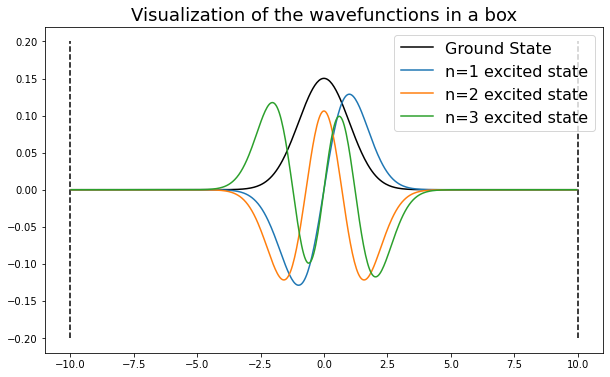

In [191]:
# Plot the wavefunction of the ground state
plt.plot(X, vec1[:, 0], 'k', label='Ground State')

# Plot the wavefunctions of the nth excited state
start_point = 1
end_point = 4
for i in range(start_point, end_point):
    plt.plot(X, vec1[:, i], label=f'n={i} excited state')

plt.title('Visualization of the wavefunctions in a box', fontsize=18)
plt.vlines((a,b), -0.2, 0.2, 'k', ls='--')
plt.rcParams['figure.figsize'] = [10, 6]
plt.legend(fontsize=16)

plt.show()

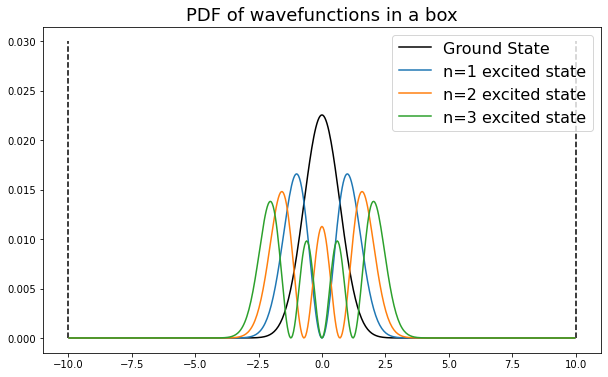

In [127]:
# Plot the Probability Density Function (PDF) of the ground state
plt.plot(X, vec1[:, 0]**2, 'k', label='Ground State')

# Plot the PDF of the nth excited state
start_point = 1
end_point = 4
for i in range(start_point, end_point):
    plt.plot(X, vec1[:, i]**2, label=f'n={i} excited state')

plt.title('PDF of wavefunctions in a box', fontsize=18)
plt.vlines((a,b), 0, 0.03, 'k', ls='--')
plt.rcParams['figure.figsize'] = [10, 6]
plt.legend(fontsize=16)

plt.show()